In [2]:
TRAIN_DIR = 'data/dev_data/dev_data/slider/train'
TEST_DIR = 'data/dev_data/dev_data/slider/test'
SAMPLE_RATE = 16000

In [3]:
import os
import pandas as pd
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

In [4]:
def plot_fft(ax, fft, color='blue', alpha=0.3, title='Magnitude Spectrum of Audio Signal'):
    # print(audio.shape)
    # fft = np.fft.fft(audio)
    freq_bins = np.fft.fftfreq(len(fft), 1/SAMPLE_RATE)
    # Plot the magnitude spectrum
    ax.plot(freq_bins[:len(freq_bins)//2], np.abs(fft)[:len(freq_bins)//2], color=color, alpha=alpha)
    ax.set_title(title)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Magnitude')
    ax.grid(True)

In [5]:
train_audios = dict()
for file_name in os.listdir(TRAIN_DIR):
    file_path = os.path.join(TRAIN_DIR, file_name)
    _, audio_data = wavfile.read(file_path)
    id = file_name.split('_')[2]
    if id in train_audios:
        train_audios[id].append(audio_data)
    else:
        train_audios[id] = [audio_data]

In [6]:
test_audios = dict()
for file_name in os.listdir(TEST_DIR):
    file_path = os.path.join(TEST_DIR, file_name)
    _, audio_data = wavfile.read(file_path)
    id = file_name.split('_')[2]
    if id in test_audios:
        test_audios[id].append(audio_data)
    else:
        test_audios[id] = [audio_data]

In [9]:
ids = sorted(train_audios.keys())

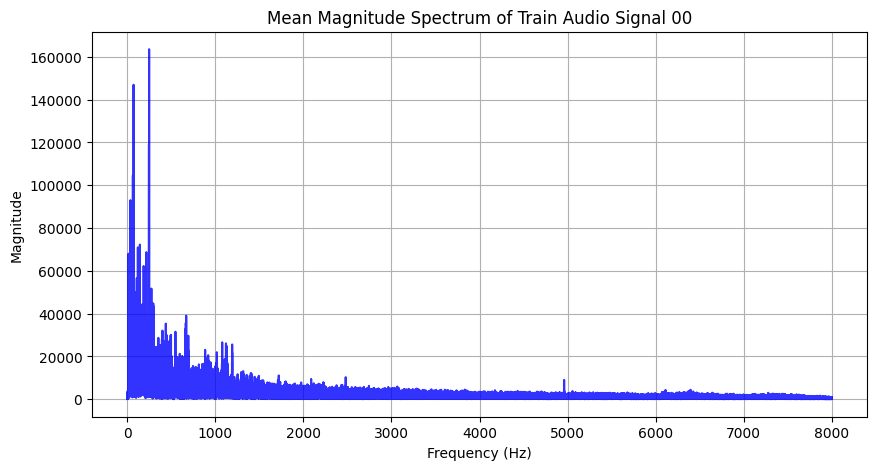

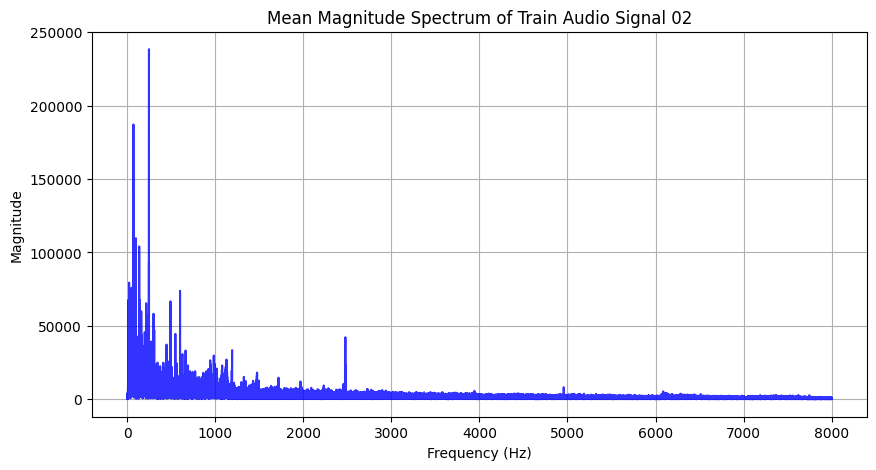

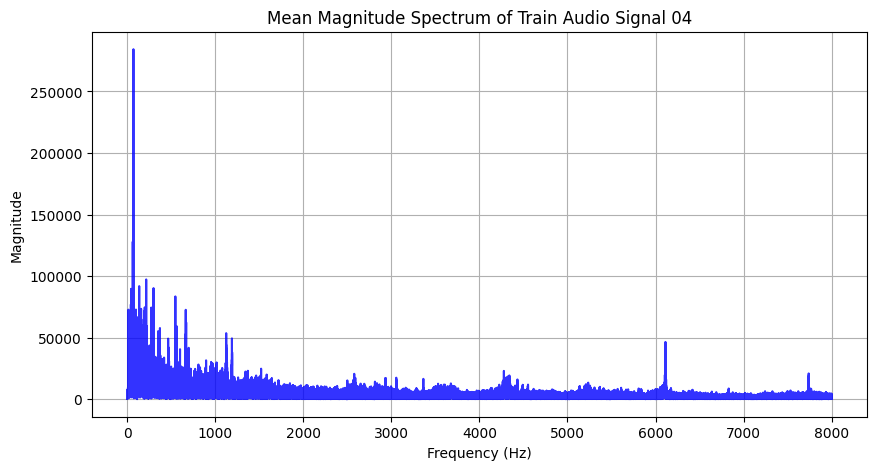

In [12]:
for id in ids:
    ffts = [np.fft.fft(audio) for audio in train_audios[id]]
    mean_fft = sum(ffts) / len(ffts)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    plot_fft(ax, mean_fft, alpha=0.8, title=f'Mean Magnitude Spectrum of Train Audio Signal {id}')
    plt.show()

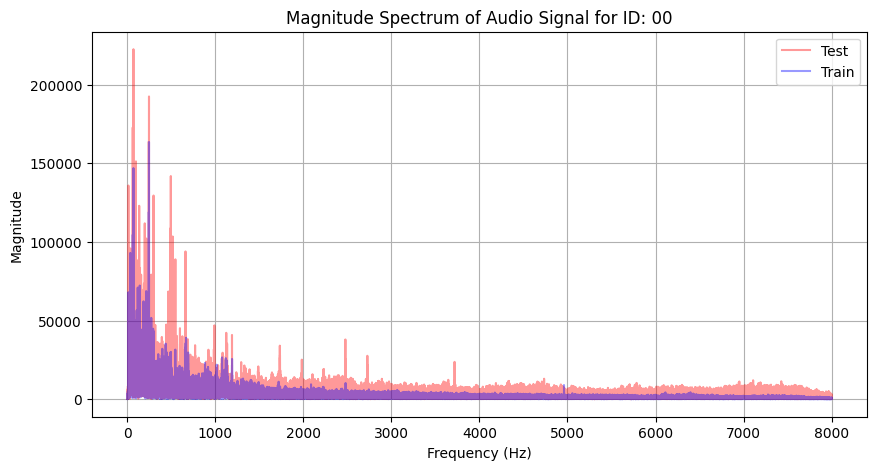

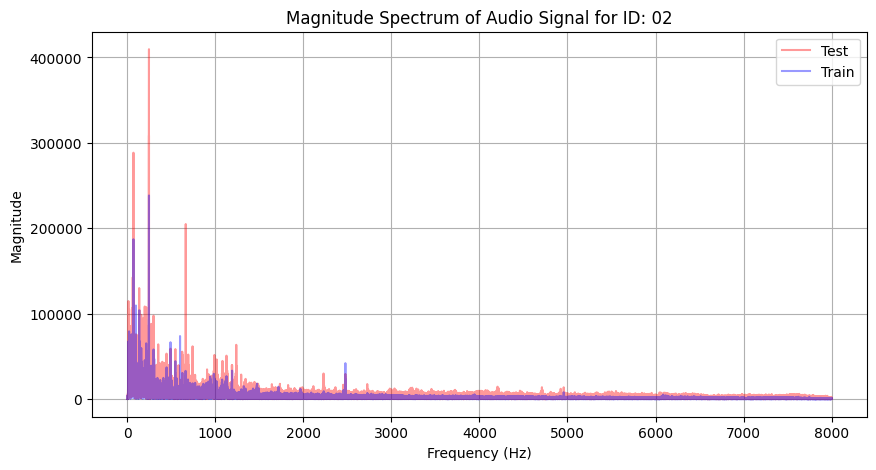

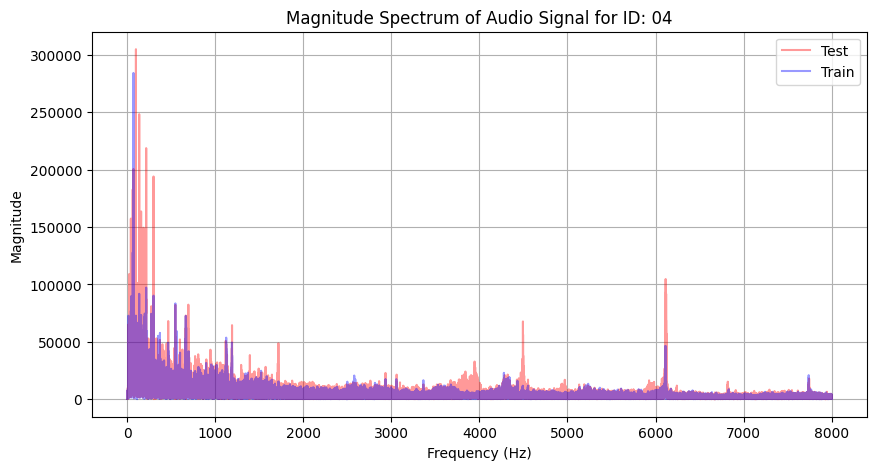

In [13]:
for id in ids:
    ffts = [np.fft.fft(audio) for audio in train_audios[id]]
    mean_fft_train = sum(ffts) / len(ffts)
    ffts = [np.fft.fft(audio) for audio in test_audios[id]]
    mean_fft_test = sum(ffts) / len(ffts)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    plot_fft(ax, mean_fft_test, color='red', alpha=0.4)
    plot_fft(ax, mean_fft_train, alpha=0.4, title=f'Magnitude Spectrum of Audio Signal for ID: {id}')

    ax.legend(['Test', 'Train'])
    plt.show()